In [ ]:
# Black and white images are not the same as the grayscale images. They are also
# represented similar to color images with 3 channels with [0,0,0] as comlete black
# [255,255,255] as complete white and [122,122,122] as middle grey.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
from tqdm import tqdm
import tensorflow
tensorflow.random.set_seed(23)
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from keras.constraints import Constraint
from keras import backend
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Dropout, LeakyReLU, Concatenate,BatchNormalization,Add,ZeroPadding2D, ReLU
from tensorflow.keras import initializers, optimizers
from tensorflow.keras.models import Model
from numpy import ones, zeros
from tensorflow.keras.utils import plot_model

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
model (Functional)              (None, 150, 150, 3)  11689747    input_4[0][0]                    
__________________________________________________________________________________________________
model_1 (Functional)            (None, 23, 23, 1)    5260867     input_4[0][0]                    
                                                                 model[0][0]                      
Total params: 16,950,614
Trainable params: 11,681,139
Non-trainable params: 5,269,475
__________________________________________________________________________________________________
None


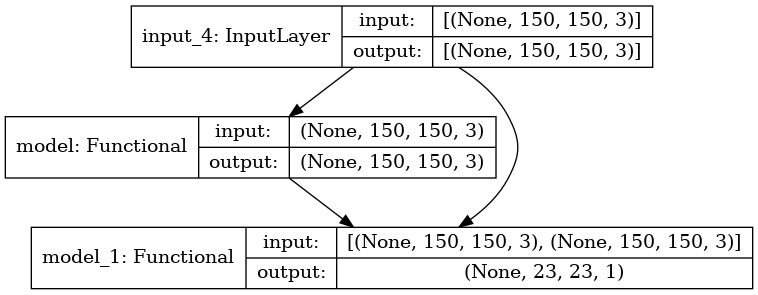

In [9]:
def generate_real_samples(trainA,trainB, n_samples, n_patch):
    idx = np.random.randint(0, len(trainA), n_samples)
    X1, X2 = trainA[idx], trainB[idx]
    # generate 'real' class labels (1)
    y = ones((n_samples, n_patch, n_patch, 1))
    return X1, X2, y, idx

def generate_fake_samples(g_model, samples, n_patch):
    X = g_model.predict(samples)
    # create 'fake' class labels (0)
    y = zeros((len(X), n_patch, n_patch, 1))
    return X, y



''' define the combined generator and discriminator model, for updating the generator
    by keeping the discriminator to trainable == False '''
def update_gen(g_model, d_model):
    d_model.trainable=False
    input_img = Input((150,150,3))
    gen_out = g_model(input_img)
    disc_out = d_model([input_img, gen_out])
    model = Model(input_img, [disc_out, gen_out])
    opt = optimizers.Adam(learning_rate=0.00002, beta_1=0.5)
    model.compile(loss=['binary_crossentropy', 'mae'], optimizer=opt,
                  loss_weights=[1,150])
    return model

gen_update_model = update_gen(generator,discriminator)
print(gen_update_model.summary())
plot_model(gen_update_model,to_file='generator_updation.png', show_shapes=True)